In [1]:
import kagglehub

# Скачиваем датасет
path = kagglehub.dataset_download("mrigaankjaswal/crop-yield-prediction-dataset")

# Выводим путь к загруженным данным
print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 217k/217k [00:00<00:00, 455kB/s]

Extracting files...
Path to dataset files: C:\Users\Azama\.cache\kagglehub\datasets\mrigaankjaswal\crop-yield-prediction-dataset\versions\1


In [3]:
import os

# Путь к директории с данными
data_path = r'C:\Users\Azama\.cache\kagglehub\datasets\mrigaankjaswal\crop-yield-prediction-dataset\versions\1'

# Список файлов в директории
files = os.listdir(data_path)
print(files)

['yield_df.csv']


In [13]:
import pandas as pd

# Путь к файлу
file_path = r'C:\Users\Azama\.cache\kagglehub\datasets\mrigaankjaswal\crop-yield-prediction-dataset\versions\1\yield_df.csv'

# Загрузка данных
data = pd.read_csv(file_path)

# Просмотр первых строк данных
print("Первые 5 строк данных:")
print(data.head())

# Получение информации о данных (типы и пропуски)
print("\nИнформация о данных:")
print(data.info())

# Статистический анализ числовых столбцов
print("\nСтатистическое описание данных:")
print(data.describe())

Первые 5 строк данных:
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  --

In [14]:
# Преобразуем столбцы 'Area' и 'Item' в категориальные переменные
data['Area'] = data['Area'].astype('category')
data['Item'] = data['Item'].astype('category')

# Проверим изменения
print(data.dtypes)

Unnamed: 0                          int64
Area                             category
Item                             category
Year                                int64
hg/ha_yield                         int64
average_rain_fall_mm_per_year     float64
pesticides_tonnes                 float64
avg_temp                          float64
dtype: object


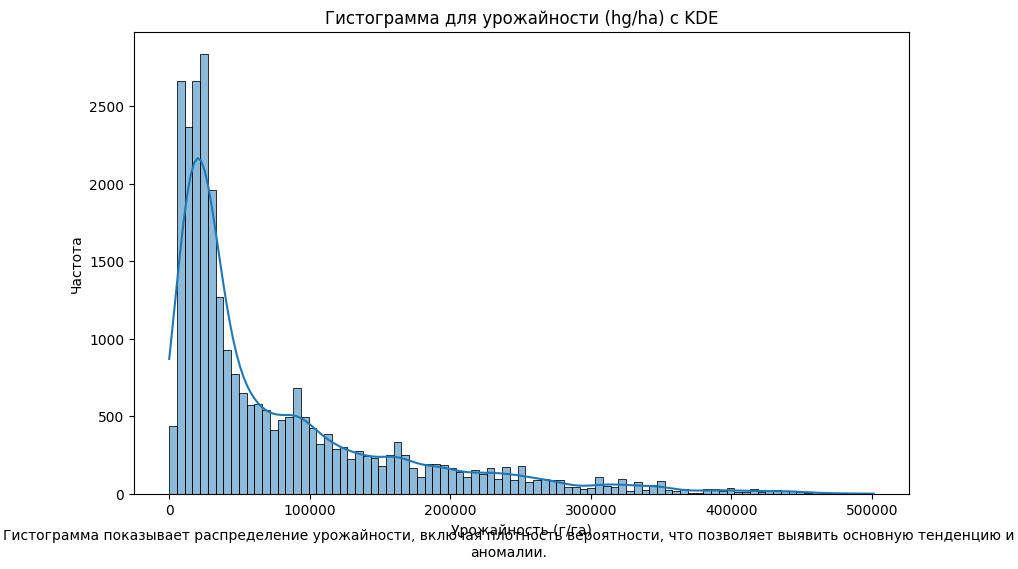

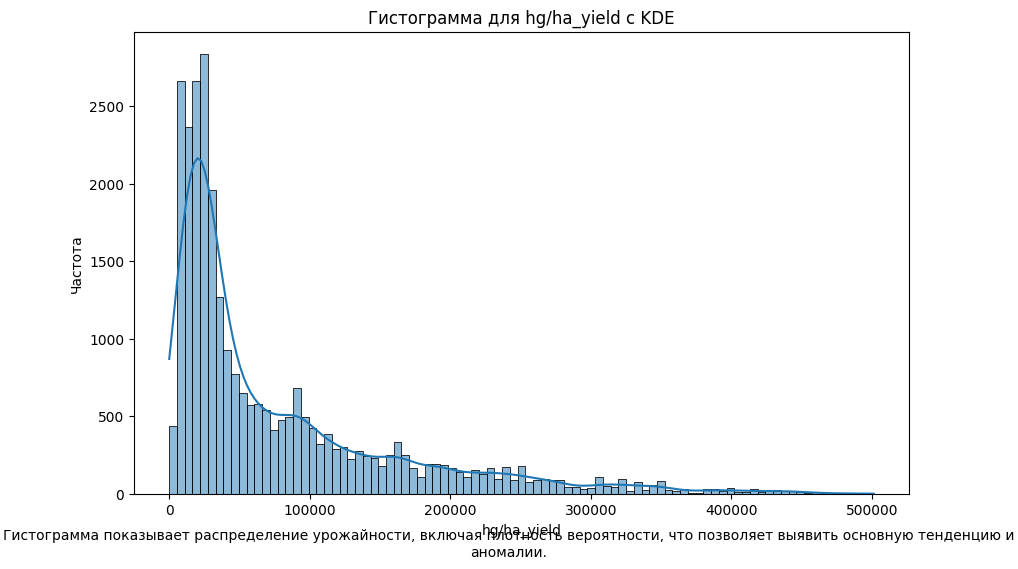

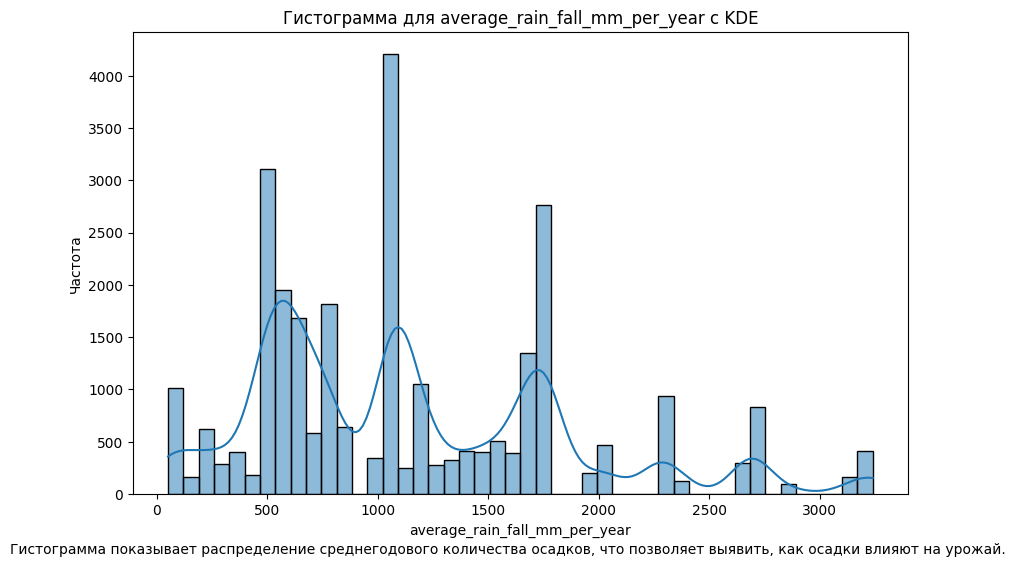

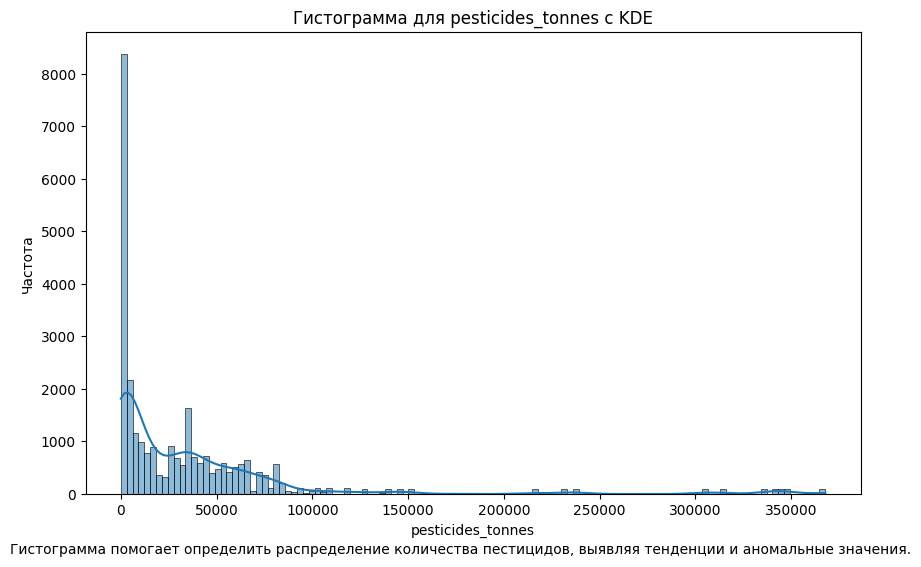

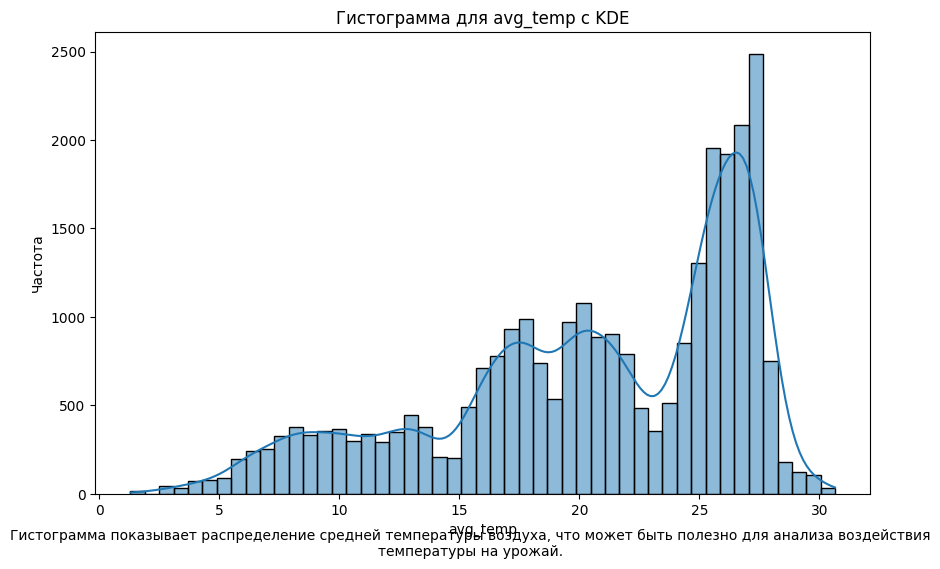

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение гистограммы для урожайности
plt.figure(figsize=(10, 6))
sns.histplot(data['hg/ha_yield'], kde=True)
plt.title('Гистограмма для урожайности (hg/ha) с KDE')
plt.xlabel('Урожайность (г/га)')
plt.ylabel('Частота')
plt.figtext(0.5, 0.01, "Гистограмма показывает распределение урожайности, включая плотность вероятности, что позволяет выявить основную тенденцию и аномалии.", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

# Построим гистограммы для других числовых столбцов
numerical_columns = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Гистограмма для {col} с KDE')
    plt.xlabel(col)
    plt.ylabel('Частота')
    
    if col == 'hg/ha_yield':
        description = "Гистограмма показывает распределение урожайности, включая плотность вероятности, что позволяет выявить основную тенденцию и аномалии."
    elif col == 'average_rain_fall_mm_per_year':
        description = "Гистограмма показывает распределение среднегодового количества осадков, что позволяет выявить, как осадки влияют на урожай."
    elif col == 'pesticides_tonnes':
        description = "Гистограмма помогает определить распределение количества пестицидов, выявляя тенденции и аномальные значения."
    elif col == 'avg_temp':
        description = "Гистограмма показывает распределение средней температуры воздуха, что может быть полезно для анализа воздействия температуры на урожай."
    
    plt.figtext(0.5, 0.01, description, wrap=True, horizontalalignment='center', fontsize=10)
    plt.show()

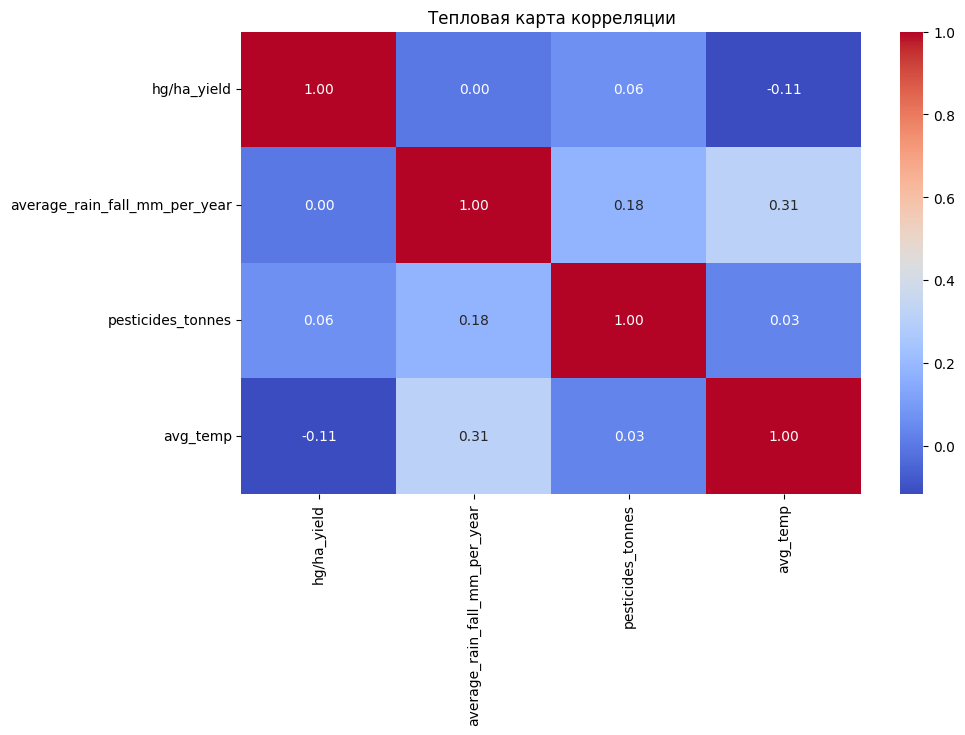

In [23]:
plt.figure(figsize=(10, 6))
corr = data[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции')
plt.show()

Тепловая карта корреляции отображает взаимосвязь между различными числовыми переменными в наборе данных. Каждая ячейка в таблице показывает коэффициент корреляции между двумя столбцами, где значения могут варьироваться от -1 (полная отрицательная корреляция) до +1 (полная положительная корреляция).

В данной диаграмме:

Светлые оттенки (красные и желтые) указывают на сильные положительные корреляции.
Темные оттенки (синие) показывают сильные отрицательные корреляции.
Нейтральные оттенки (белые и зеленые) указывают на слабую или отсутствующую корреляцию.
Тепловая карта помогает выявить, какие переменные тесно связаны между собой. Например, высокая положительная корреляция между переменными может означать, что при увеличении одной переменной другая также увеличивается. Важность этой карты заключается в том, что она помогает определить наиболее важные факторы, которые могут оказывать влияние на другие, что полезно при построении модели или анализе данных.

Пример интерпретации:
Если коэффициент корреляции между "hg/ha_yield" и "average_rain_fall_mm_per_year" высок, это может означать, что урожайность зависит от количества осадков.
Если корреляция между "avg_temp" и "hg/ha_yield" низкая или отрицательная, это может свидетельствовать о том, что температура не оказывает значительного влияния на урожайность.
Тепловая карта позволяет быстро визуализировать такие зависимости и использовать их для дальнейшего анализа и принятия решений.

In [24]:
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Определение выбросов
outliers = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # Покажет количество выбросов в каждом столбце

hg/ha_yield                      2059
average_rain_fall_mm_per_year       0
pesticides_tonnes                1418
avg_temp                           34
dtype: int64


In [25]:
# Выводим строки с выбросами по урожайности
outlier_data = data[outliers['hg/ha_yield']]
print("Выводим строки с выбросами по урожайности (hg/ha):")
print(outlier_data)

Выводим строки с выбросами по урожайности (hg/ha):
       Unnamed: 0            Area      Item  Year  hg/ha_yield  \
88             88         Albania  Potatoes  2011       242211   
92             92         Albania  Potatoes  2012       250538   
96             96         Albania  Potatoes  2013       260110   
184           184         Algeria  Potatoes  2008       236393   
189           189         Algeria  Potatoes  2009       250764   
...           ...             ...       ...   ...          ...   
27703       27703  United Kingdom  Potatoes  2013       408993   
27704       27704  United Kingdom  Potatoes  2013       408993   
27705       27705  United Kingdom  Potatoes  2013       408993   
27706       27706  United Kingdom  Potatoes  2013       408993   
27707       27707  United Kingdom  Potatoes  2013       408993   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
88                            1485.0            1302.63     16.45  
92                  

In [26]:
# Вычисляем границы для выявления выбросов по урожайности
Q1 = data['hg/ha_yield'].quantile(0.25)
Q3 = data['hg/ha_yield'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, исключая выбросы
clean_data = data[(data['hg/ha_yield'] >= lower_bound) & (data['hg/ha_yield'] <= upper_bound)]

# Выводим чистые данные без выбросов
print(clean_data)


       Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2  